In [1]:
#importing libraries dataset
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.replace(to_replace=["Male", "Female"], value=[1,0], inplace=True) #male=1 ' female=0'

In [5]:
#df.info()

In [6]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [7]:
df.Gender.value_counts()

1    5000
0    3555
Name: Gender, dtype: int64

In [8]:
len(df)

8555

In [9]:
#df.Gender

# Step 01 - Regression

In [10]:
#Seperate x,y
x = df.drop('Weight', axis=1)
y = df[['Weight']]

In [11]:
x.head(2)

,Gender,Height
0,1,73.847017
1,1,68.781904


In [14]:
#x.columns

In [15]:
from matplotlib import pyplot as plt

import warnings as wr
wr.filterwarnings('ignore') # will ignore warnings

Text(0.5, 1.0, 'Height weight values')

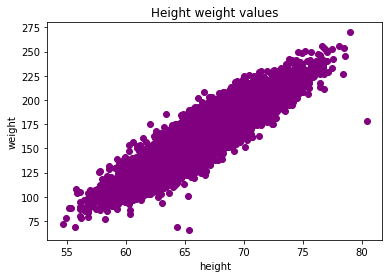

In [16]:
#plt.scatter(x.Height,y.Weight, color='green') 
plt.scatter(df.Height,df.Weight, color='purple') 
plt.xlabel('height')
plt.ylabel('weight')
plt.title('Height weight values')

In [21]:
from sklearn.model_selection import train_test_split 
#3. seperation of training and testing data,70% data is used to train the model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1) 

In [22]:
len(x_train) # checking the size of the training data

5988

In [23]:
len(x_test) # checking the size of the testing data: 30% of 8555

2567

In [24]:
x_train.head(3)

,Gender,Height
1277,1,72.385301
5361,0,60.960147
5728,0,69.119292


In [25]:
x_train.shape

(5988, 2)

In [26]:
'''4. apply linear regression'''

'4. apply linear regression'

In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [29]:
#x_train[['Height']].head()

In [31]:
#y_train.head()

In [ ]:
#x_train.Height

In [32]:
lr.fit(x_train[['Height']],y_train) #training the model

LinearRegression()

In [35]:
#df['predicted_wgt']=lr.predict(x[['Height']])

In [36]:
#df['predicted_wgt'].head()

In [37]:
df.Weight.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [44]:
y_pred = lr.predict(x_test[['Height']]) #predicting the results for test data sets. keeping the predicted values of height in y_pred

In [45]:
y_pred

array([[152.16232007],
       [196.26120163],
       [179.70633394],
       ...,
       [173.8235161 ],
       [182.52135569],
       [201.25174619]])

In [46]:
y_test.head()

,Weight
7154,160.800726
3258,184.516688
2188,184.262796
5609,166.844114
3186,200.466282


In [47]:
lr.score(x_test[['Height']],y_test) # checking testing accuracy of the linear regression model

0.8588721747814502

In [60]:
lr.score(x_train[['Height']],y_train) # checking training accuracy of the linear regression model

0.8486997810516949

In [48]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred) # calculating mean squared error

In [49]:
mse

149.63787379522267

In [50]:
# knn regression
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=167)

In [51]:
knn.fit(x_train[['Height']],y_train) #training the data sets

KNeighborsRegressor(n_neighbors=167)

In [53]:
y_pred_knn = knn.predict(x_test[['Height']]) # testing the model with testing data sets and storing those values in y_pred_nn

In [54]:
y_pred_knn

array([[151.57520807],
       [195.67072694],
       [182.22634641],
       ...,
       [175.04521212],
       [184.86883384],
       [201.23084925]])

In [55]:
mse_knn = mean_squared_error(y_test,y_pred_knn) # mse using knn 

In [56]:
mse_knn

149.34534598151976

In [58]:
knn.score(x_test[['Height']],y_test)  # checking testing accuracy of the knn regression model

0.8591480662594347

In [59]:
knn.score(x_train[['Height']],y_train)  # checking training accuracy of the knn regression model

0.8528058267654641

# comparison

In [61]:
'''knn model is showing better accuracy than linear regression. Though I was expecting better accuracy in the case of
linear regression model as the datas were more like linear! 

'''

'knn model is showing better accuracy than linear regression. Though I was expecting better accuracy in the case of\nlinear regression model as the datas were more like linear! \n\n'

# Step 02 - Classification

In [62]:
x = df.drop('Gender', axis=1)
y = df[['Gender']]

In [63]:
y.head()

,Gender
0,1
1,1
2,1
3,1
4,1


In [64]:
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [65]:
from sklearn.model_selection import train_test_split 
#seperation of training and testing data,70% data is used to train the model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1) 

In [66]:
len(x_train)

5988

In [67]:
x_train.shape

(5988, 2)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors=77)

In [69]:
knnc.fit(x_train,y_train) # training the model

KNeighborsClassifier(n_neighbors=77)

In [74]:
y_predc = knnc.predict(x_test) # predicting results for testing data sets, keeping optputs in y_predc

In [80]:
y_predct = knnc.predict([[69.881796,206.349801]])

In [81]:
y_predct

array([1], dtype=int64)

In [82]:
y_test

,Gender
7154,0
3258,1
2188,1
5609,0
3186,1
...,...
8004,0
7644,0
8521,0
957,1


In [84]:
knnc.score(x_test,y_test) # checking testing accuracy

0.9205298013245033